In [2]:
import pandas as pd

In [12]:
demos = pd.read_pickle("./cs285/experts/expert_data_Cartpole-v1.pkl")

In [15]:
demos[0]["terminal"].shape

(1000,)

In [14]:
demos[1]["observation"].shape

(1000, 4)

In [7]:
demos[1]["reward"].shape

(1000,)

In [14]:
len(demos)

2

In [25]:
demos = pd.read_pickle("./cs285/experts/expert_data_Hopper-v4.pkl")

In [26]:
demos[1]["observation"].shape

(1000, 11)

In [27]:
demos[1]["reward"].shape

(1000,)

In [18]:
len(demos)

2

In [34]:
demos = pd.read_pickle("./cs285/experts/expert_data_Cartpole-v1.pkl")

In [36]:
demos[0]["observation"].shape

(1000, 4)

In [38]:
demos[0]["reward"].shape

(1000,)

In [39]:
len(demos)

2

In [19]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(
    n_clusters=None, metric="l2", linkage="average", distance_threshold=0.5
)

In [2]:
import numpy as np

clustering_model.fit(np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]]))

NameError: name 'clustering_model' is not defined

In [34]:
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd


def parse_tensorboard(path, scalars):
    """returns a dictionary of pandas dataframes for each requested scalar"""
    ea = event_accumulator.EventAccumulator(
        path,
        size_guidance={event_accumulator.SCALARS: 0},
    )
    _absorb_print = ea.Reload()
    print(ea.Tags())
    # make sure the scalars are in the event accumulator tags
    assert all(
        s in ea.Tags()["scalars"] for s in scalars
    ), "some scalars were not found in the event accumulator"
    return {k: pd.DataFrame(ea.Scalars(k)) for k in scalars}

In [35]:
rollout_stats = [
    "rollout/return_max",
    "rollout/return_mean",
    "rollout/return_min",
    "rollout/return_std",
]
stats = parse_tensorboard(
    "logs/ant/bc_06_23:34:40",
    rollout_stats,
)

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['batch_size', 'bc/batch', 'bc/ent_loss', 'bc/entropy', 'bc/epoch', 'bc/l2_loss', 'bc/l2_norm', 'bc/loss', 'bc/neglogp', 'bc/prob_true_act', 'bc/samples_so_far', 'rollout/return_max', 'rollout/return_mean', 'rollout/return_min', 'rollout/return_std'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


<Axes: >

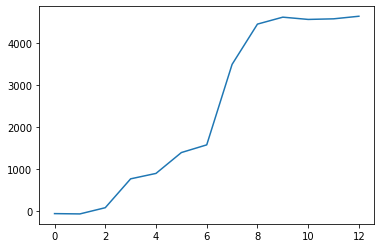

In [40]:
stats["rollout/return_mean"].value.plot()

In [6]:
from scipy import stats

stats.mode([1, 1, 2, 3], keepdims=False).mode

1

In [4]:
import numpy as np

np.percentile(np.array([1, 2, 3]), 20)

1.4